Inspired in: https://playground.tensorflow.org/

In [1]:
using Revise
using PyPlot, OCDNN

┌ Info: Precompiling OCDNN [04e95dd8-2660-4c0e-9d70-3f4d10bb3a0d]
└ @ Base loading.jl:1317


In [2]:
dataset = build_dataset();
data, feat = dataset;

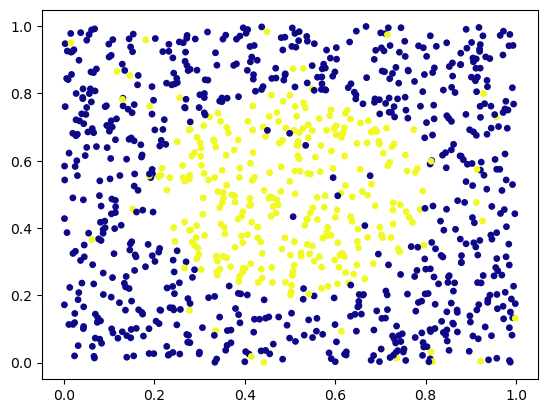

PyObject <matplotlib.collections.PathCollection object at 0x0000000056875C88>

In [3]:
scatter(data[:,1],data[:,2], c = feat, cmap = "plasma", s = 15)

In [4]:
nlayers = 15
channels = 2
niter = 1000
τ=0.1;
τ_max=10;
stepsize = 0.1;

In [5]:
A_eu = 0;
w_eu = 1;
A_ie = [0 0 1 0];
w_ie = [0.5  0.5];
A_kutta4 = [0 0 0 0;0.5 0 0 0;0 0.5 0 0;0 0 1 0];
w_kutta4 = 1/6*[1;2;2;1];
A_kutta3 = [0 0 0;1/2 0 0;-1 2 0];
w_kutta3 = [1/6;2/3;1/6];

In [6]:
rkmethod = OCDNN.ExplicitRungeKutta(A_kutta4,w_kutta4,"RK4")

OCDNN.ExplicitRungeKutta(4, [0.0 0.0 0.0 0.0; 0.5 0.0 0.0 0.0; 0.0 0.5 0.0 0.0; 0.0 0.0 1.0 0.0], [0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666], [0.0 1.0 0.0 0.0; 0.0 0.0 0.5 0.0; 0.0 0.0 0.0 0.5; 0.0 0.0 0.0 0.0], "RK4")

In [11]:
train_ode_dnn(dataset, nlayers, channels, rkmethod, niter, τ, τ_max, stepsize)

LoadError: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 2 and 1000")